# Foods & Services Price Index
Baseline is the year 2017

In [101]:
# Import cecessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [94]:
# Read the data
data = pd.read_csv('Service Producer Price Index - base 2017.csv')

In [25]:
# Show the first 10 rows
data.head(10)

,Year,Month,Accommodation and food services,Food and beverage serving services
0,2017,January,94.56,96.37
1,2017,February,94.87,96.96
2,2017,March,95.89,97.48
3,2017,April,96.95,98.23
4,2017,May,98.48,98.83
5,2017,June,101.01,99.87
6,2017,July,104.39,101.27
7,2017,August,105.18,101.17
8,2017,September,103.76,101.63
9,2017,October,102.19,102.32


In [26]:
# Describe the data
data.describe()

,Year,Accommodation and food services,Food and beverage serving services
count,75.000000,75.000000,75.000000
mean,2019.640000,201.568000,186.821733
std,1.820603,122.587454,108.998703
min,2017.000000,94.560000,96.370000
25%,2018.000000,124.995000,115.040000
50%,2020.000000,149.720000,147.890000
75%,2021.000000,226.070000,193.970000
max,2023.000000,573.770000,546.350000


# Datetime Format

In [95]:
# Convert 'Year' and 'Month' columns to datetime format
data['Time'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'], format='%Y-%B')

# Set the 'Time' column as the DataFrame index
data.set_index('Time', inplace=True)

# Remove the original 'Year' and 'Month' columns
data.drop(['Year', 'Month'], axis=1, inplace=True)

In [15]:
data.head(10)

,Accommodation and food services,Food and beverage serving services
Time,,
2017-01-01,94.56,96.37
2017-02-01,94.87,96.96
2017-03-01,95.89,97.48
2017-04-01,96.95,98.23
2017-05-01,98.48,98.83
2017-06-01,101.01,99.87
2017-07-01,104.39,101.27
2017-08-01,105.18,101.17
2017-09-01,103.76,101.63


# Visualization

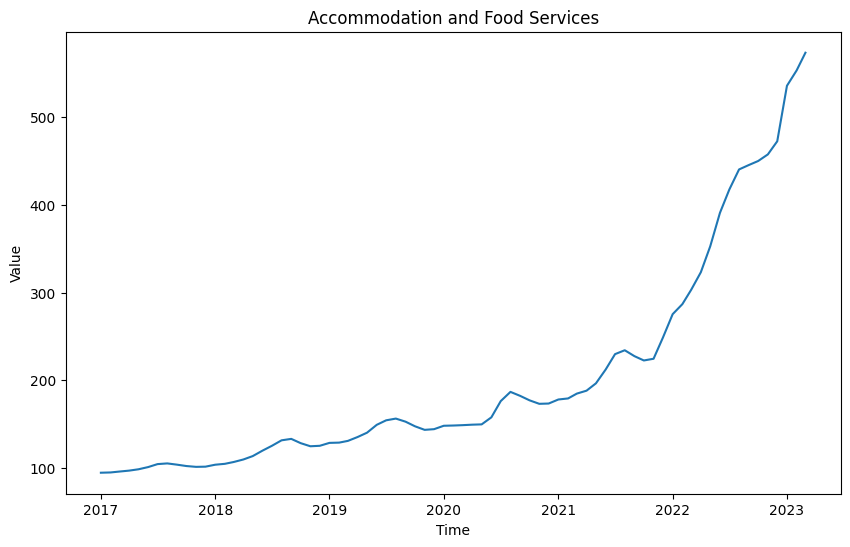

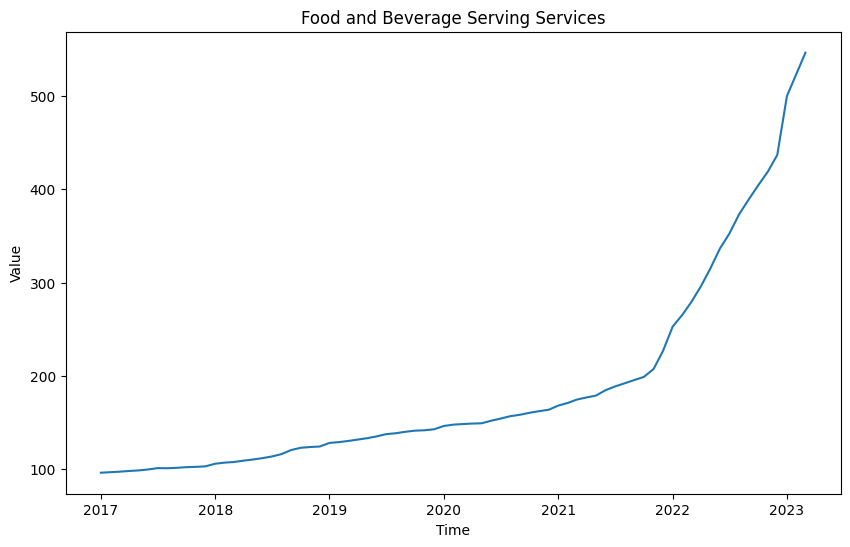

In [82]:
# Plotting "Accommodation and food services"
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Accommodation and food services'])
plt.title('Accommodation and Food Services')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Plotting "Food and beverage serving services"
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Food and beverage serving services'])
plt.title('Food and Beverage Serving Services')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [33]:
# Split the data into training and test sets
train = data.loc[:'2019-09-01', 'Accommodation and food services']
test = data.loc['2019-09-01':, 'Accommodation and food services']

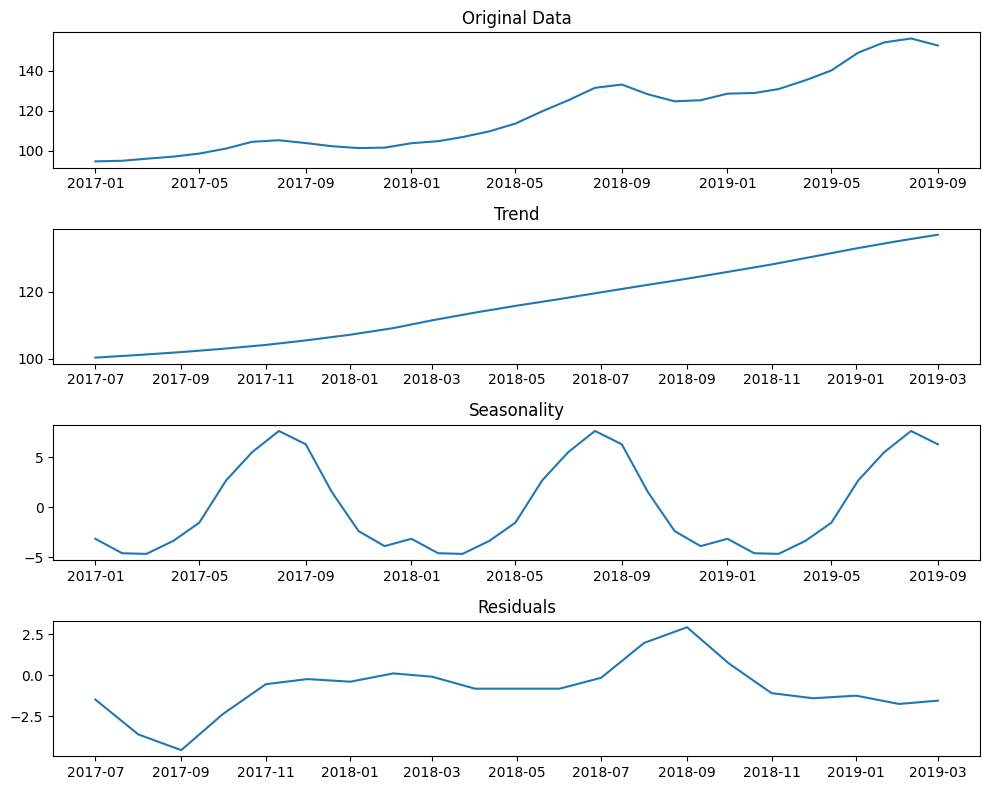

In [38]:
# Time series decomposition
decomposition = seasonal_decompose(train, model='additive')

plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(train.index, train)
plt.title('Original Data')
plt.subplot(4, 1, 2)
plt.plot(train.index, decomposition.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(train.index, decomposition.seasonal)
plt.title('Seasonality')
plt.subplot(4, 1, 4)
plt.plot(train.index, decomposition.resid)
plt.title('Residuals')
plt.tight_layout()
plt.show()

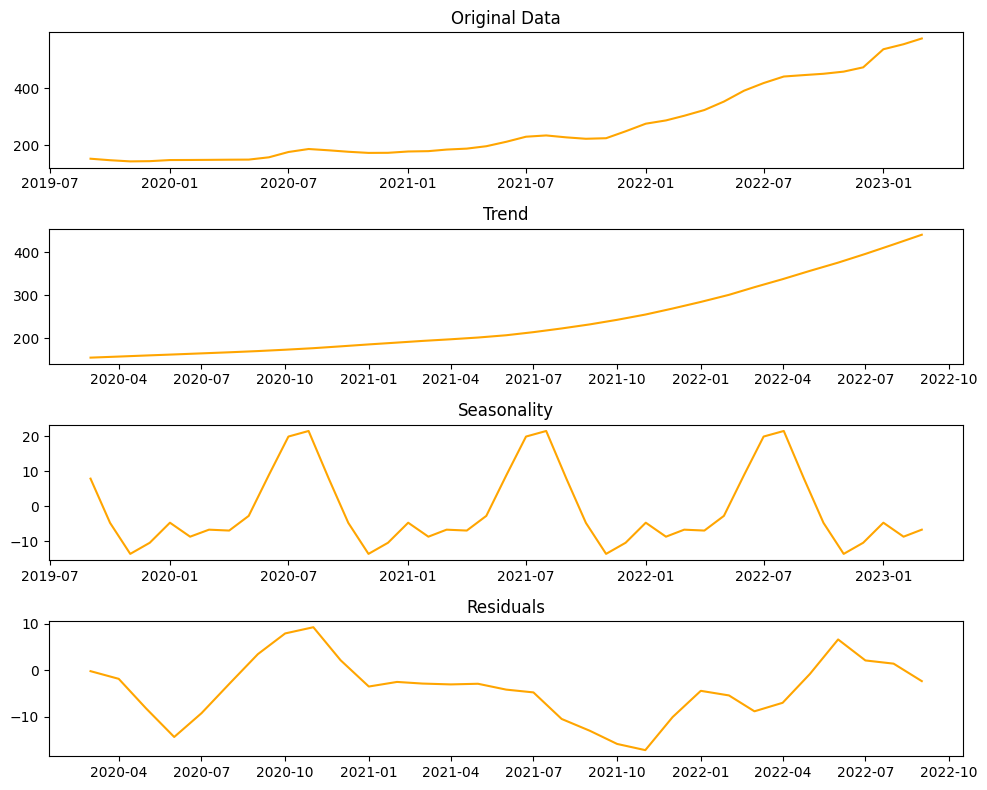

In [47]:
# Time series decomposition
decomposition = seasonal_decompose(test, model='additive')

plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(test.index, test, color='orange')
plt.title('Original Data')
plt.subplot(4, 1, 2)
plt.plot(test.index, decomposition.trend, color='orange')
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(test.index, decomposition.seasonal, color='orange')
plt.title('Seasonality')
plt.subplot(4, 1, 4)
plt.plot(test.index, decomposition.resid, color='orange')
plt.title('Residuals')
plt.tight_layout()
plt.show()

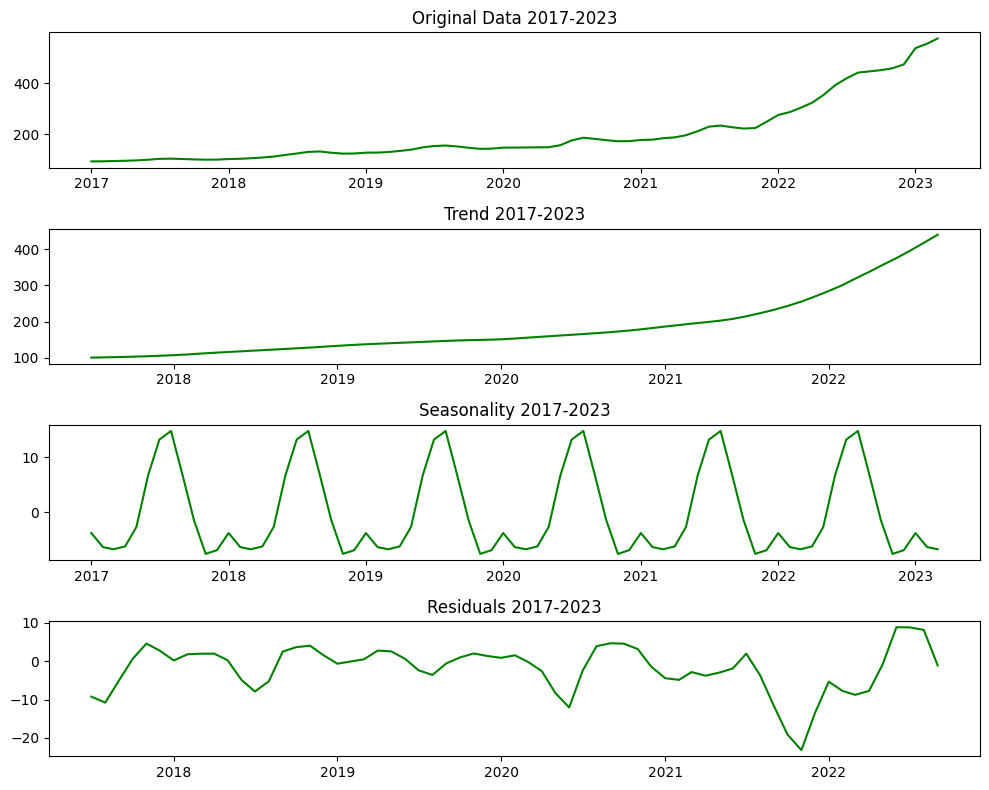

In [53]:
all_data = data.loc['2017-01-01	':, 'Accommodation and food services']
decomposition = seasonal_decompose(all_data, model='additive')

plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(all_data.index, all_data, color='green')
plt.title('Original Data 2017-2023')
plt.subplot(4, 1, 2)
plt.plot(all_data.index, decomposition.trend, color='green')
plt.title('Trend 2017-2023')
plt.subplot(4, 1, 3)
plt.plot(all_data.index, decomposition.seasonal, color='green')
plt.title('Seasonality 2017-2023')
plt.subplot(4, 1, 4)
plt.plot(all_data.index, decomposition.resid, color='green')
plt.title('Residuals 2017-2023')
plt.tight_layout()
plt.show()

# Using ARIMA
Adjusting the order of the ARIMA model means selecting appropriate values for the parameters `(p, d, q)` based on the characteristics of the data. Each parameter represents:

- `p` (AR): It represents the autoregressive order, which captures the relationship between the observation and a certain number of lagged observations. A higher value of `p` indicates a more complex dependency on past values.

- `d` (I): It represents the differencing order, which is the number of times the data needs to be differenced to make it stationary. Differencing removes trends or seasonality from the data.

- `q` (MA): It represents the moving average order, which captures the dependency between the observation and a residual error from a moving average model applied to lagged observations. A higher value of `q` indicates a more complex dependency on past forecast errors.

To determine the appropriate values for `(p, d, q)`, we can analyze the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots of the time series. These plots provide insights into the potential values of `p` and `q`.

---

## Adjusting the Order
1. Plotting the ACF and PACF plots for the differenced time series (`train.diff().dropna()`).
2. Identify the significant lags where the autocorrelation crosses the significance boundary (shaded region). The ACF plot helps identify the `q` value, and the PACF plot helps identify the `p` value.
3. Choosing a range of values for `p` and `q` based on the significant lags.
4. Iterating through different combinations of `p` and `q`, along with a fixed value for `d`, and select the combination that minimizes a suitable evaluation metric (e.g., AIC, BIC, MSE).
5. Fitting the ARIMA model with the chosen `(p, d, q)` values.

We can adjust the `(p, d, q)` order in the `ARIMA` model instantiation based on the significant lags observed, by examining the ACF and PACF plots.

---

### What is a Signifanct Lag?
In time series analysis, a significant lag is a lag that has a noticeable correlation with the current observation. It indicates the number of lagged terms to include in the autoregressive (AR) and moving average (MA) components of the ARIMA model.

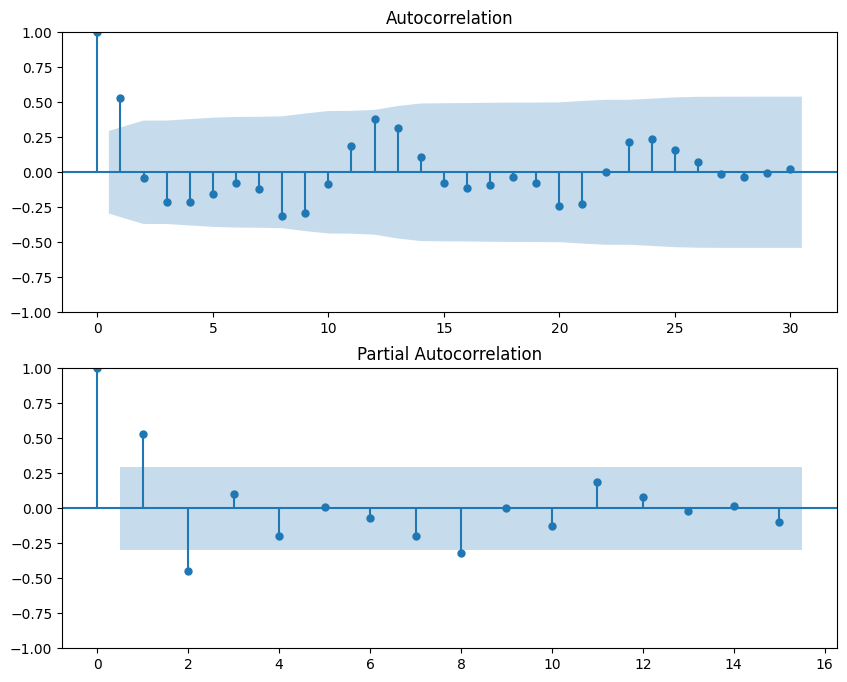

In [96]:
# Generate ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train.diff().dropna(), lags=30, ax=ax[0])
plot_pacf(train.diff().dropna(), lags=15, ax=ax[1]) # can't go above 15
plt.show()

# Visualizing ARIMA

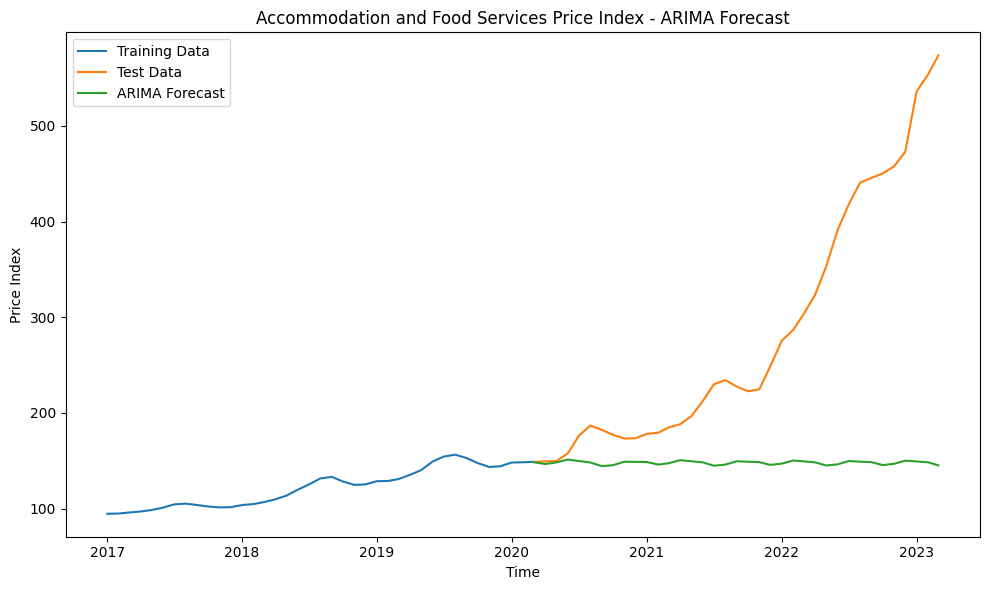

In [97]:
# Set the frequency of the data to monthly
data = data.asfreq('MS')

# Split the data into training and test sets
train = data.loc[:'2020-03-01', 'Accommodation and food services']
test = data.loc['2020-03-01':, 'Accommodation and food services']

# Create and fit the ARIMA model
model = ARIMA(train, seasonal_order=(1, 1, 1, 5))  # Adjust the order as per the data characteristics
arima_model = model.fit()

# Forecast using the ARIMA model
forecast = arima_model.predict(start=test.index[0], end=test.index[-1])

# Plot the ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast.index, forecast, label='ARIMA Forecast')
plt.title('Accommodation and Food Services Price Index - ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Price Index')
plt.legend()
plt.tight_layout()
plt.show()

# Comparison Between Forecast & Test Data
## Mean Squared Error
$$\Large
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

## Mean Aboslte Error
$$\Large
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

In [102]:
series1 = pd.Series(test.squeeze())
series2 = pd.Series(forecast.squeeze())

# Mean Squared Error (MSE)
mse = mean_squared_error(series1, series2)

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(series1 - series2), axis=0)

print(">>>\tMSE:", mse)
print(">>>\tMAE:", mae)

>>>	MSE: 34832.26335758336
>>>	MAE: 135.41340719677527


# SARIMA
Seasonal Autoregressive Integrated Moving Average (SARIMA) is a popular time series forecasting model that extends the capabilities of the ARIMA model to capture seasonal patterns in the data. SARIMA models are particularly useful when dealing with time series data that exhibit seasonal variations.

In the context of forecasting the price index of the accommodation and food services, SARIMA can help capture both the long-term trends and the seasonal patterns that might exist in the data. By incorporating autoregressive (AR), differencing (I), and moving average (MA) components, SARIMA models can effectively model the dependencies and fluctuations in the time series data.

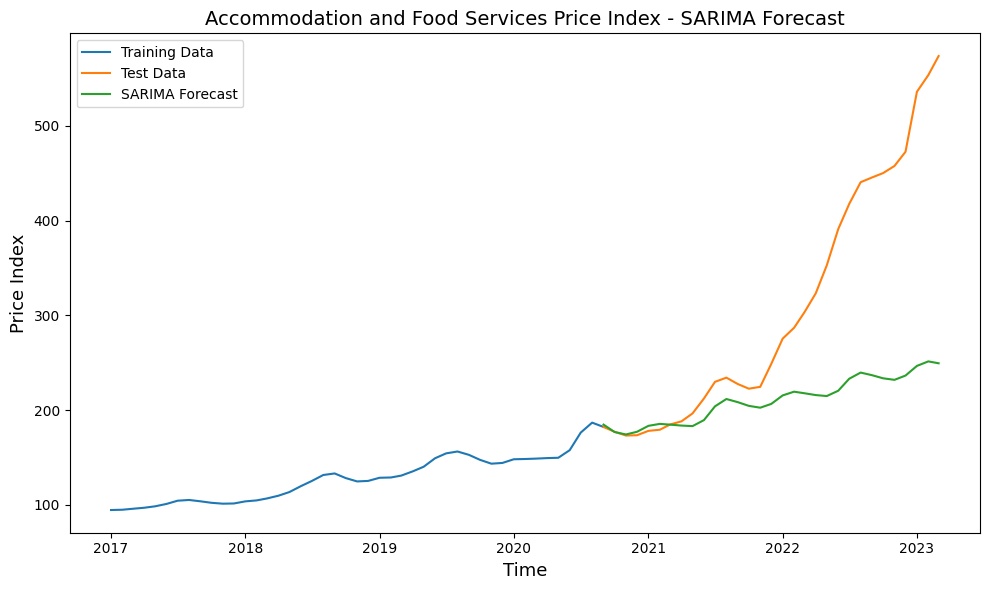

In [103]:
# Set the frequency of the data to monthly
data = data.asfreq('MS')

# Split the data into training and test sets
# but include more samples for better prediction
train = data.loc[:'2020-09-01', 'Accommodation and food services']
test = data.loc['2020-09-01':, 'Accommodation and food services']

# Create and fit the SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 6))  # Adjust the order as per the data characteristics
sarima_model = model.fit()

# Forecast using the SARIMA model
forecast = sarima_model.predict(start=test.index[0],
                                end=test.index[-1])

# Plot the SARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast.index, forecast, label='SARIMA Forecast')
plt.title('Accommodation and Food Services Price Index - SARIMA Forecast', fontsize=14)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Price Index', fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()

In [105]:
series3 = pd.Series(test.squeeze())
series4 = pd.Series(forecast.squeeze())

# Mean Squared Error (MSE)
mse = mean_squared_error(series3, series4)

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(series3 - series4), axis=0)

print(">>>\tMSE:", mse)
print(">>>\tMAE:", mae)

>>>	MSE: 20388.151044514503
>>>	MAE: 97.65658678719


# ARIMA versus SARIMA
## Comparison of Graphs and Forecasts
When comparing the graphs generated by both models, it becomes evident that SARIMA better captures the observed patterns in the price index of the accommodation and food services. The SARIMA forecast aligns closer with the actual data, capturing the overall trend as well as the seasonal variations. On the other hand, the ARIMA forecast appears to be far less accurate, showing a straight line after the split of the data and failing to capture the upward trend that should be present.

The SARIMA model takes into account both the autoregressive, differencing, and moving average components, as well as the seasonal patterns in the data. By incorporating these elements, SARIMA is able to capture the complex dynamics and fluctuations observed in the price index. This leads to improved forecast accuracy and a better representation of the underlying trends in the data.

## MSE and MAE
Upon evaluating the performance of both models, SARIMA outperformed ARIMA in terms of forecast accuracy. The mean squared error (MSE) and mean absolute error (MAE) metrics were used to assess the accuracy of the forecasts. For the ARIMA model, the MSE was found to be 34,832.26, and the MAE was 135.41. In contrast, the SARIMA model achieved a lower MSE of 20,388.15 and a significantly reduced MAE of 97.66.